In [122]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import integrate

In [123]:
N = 100
x_start, x_end = -1.0,1.0
y_start, y_end = -1.5,1.5
x = np.linspace (x_start,x_end,N)
y = np.linspace (y_start,y_end,N)
X, Y = np.meshgrid(x, y) 


In [124]:
u_inf = 1.0     # free-stream speed
t=0.1
# calculates the free-stream velocity components
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

In [125]:
class Source:
    """Contains information related to a source/sink."""
    def __init__(self, strength, x, y):
        """Initializes the source/sink.
        
        Arguments
        ---------
        strength -- strength of the source/sink.
        x, y -- coordinates of the source/sink.
        """
        self.strength = strength
        self.x, self.y = x, y

    def velocity(self, X, Y):
        """Computes the velocity field generated by the source/sink.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

    def stream_function(self, X, Y):
        """Computes the stream-function generated by the source/sink.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [126]:
sigma = 2.5    # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : X[i,j]/(X[i,j]**2+(Y[i,j]-s)**2)
        u_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, y_min, y_max)[0]
        
        integrand = lambda s: (Y[i,j]-s)/(X[i,j]**2+(Y[i,j]-s)**2)
        v_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, y_min, y_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

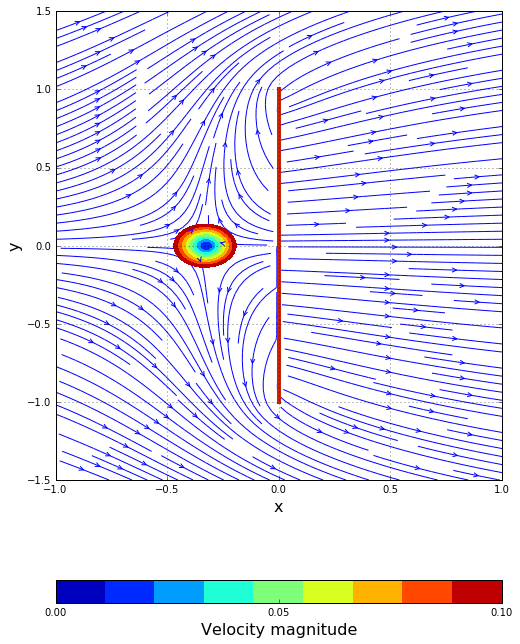

In [127]:
# plots the streamlines
%matplotlib inline

size = 8
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axvline(0.0, (y_min-y_start)/(y_end-y_start), (y_max-y_start)/(y_end-y_start), 
            color='#CD2305', linewidth=4)
velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.1, 10))
cbar = plt.colorbar(velocity, ticks=[0, 0.05, 0.1], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16);

In [128]:
N = 100
x_start, x_end = -0.5,2
y_start, y_end = -1.0,1.0
x = np.linspace (x_start,x_end,N)
y = np.linspace (y_start,y_end,N)
X, Y = np.meshgrid(x, y) 

In [129]:
sigma = 2.5    # strength of the source-sheet

# boundaries of the source-sheet
x_min, x_max = 0.5,1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : ((X[i,j]-s)/(X[i,j]**2+(Y[i,j])**2))
        u_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s: (Y[i,j])/((X[i,j])**2+(Y[i,j])**2)
        v_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

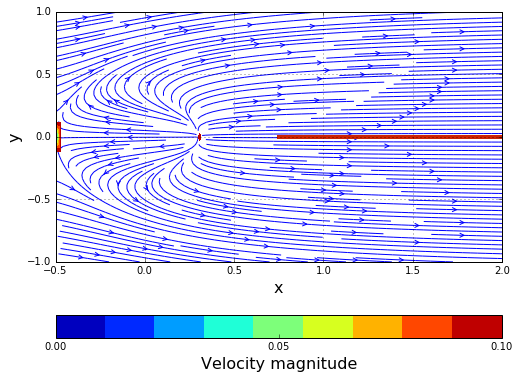

In [130]:
size = 8
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axhline(0.0, 0.5, 1, 
            color='#CD2305', linewidth=4)
velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.1, 10))
cbar = plt.colorbar(velocity, ticks=[0, 0.05, 0.1], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16);

In [131]:
def get_sigma(s,t):
    
    
    sigma = 2*u_inf*5*t*((0.2969*x**(-1/2))/2-0.1260-(2*0.3516*x)+(3*x**2*0.2843)-(4*x**3*0.1015))
    
    return sigma

                                                                           

In [133]:
N = 10                               # Number of points in each direction
x_start, x_end = -.50, 1.50           # x-direction boundaries
y_start, y_end = -.5, .5              # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

t=.1

# boundaries of the source-sheet
x_min, x_max = 0.0001, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : get_sigma(s,t)*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s:  get_sigma(s,t)*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

# plots the streamlines
%matplotlib inline

size = 8
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axhline(0.0, .5, 1, 
            color='#CD2305', linewidth=4)
velocity = plt.contourf(X, Y, npy.sqrt(u**2+v**2), levels=numpy.linspace(0.0, 0.1, 10))


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


error: Supplied function does not return a valid float.